In [1]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import pandas as pd
import numpy as np
from pyfolio.timeseries import perf_stats

read backtest results and generate daily returns dataframe

In [2]:
results = pd.read_pickle('results_strategy_2a_2008-2018.pickle')

In [3]:
returns = results.returns
returns.tail()

2018-10-25 20:00:00+00:00   -0.001402
2018-10-26 20:00:00+00:00   -0.035565
2018-10-29 20:00:00+00:00    0.005456
2018-10-30 20:00:00+00:00    0.009715
2018-10-31 20:00:00+00:00    0.019382
Name: returns, dtype: float64

number of daily return data points:

In [4]:
len(results)

2729

In [5]:
returns.reset_index(drop=True, inplace=True)

# Generate random paths by resampling from returns (with replacements)

change this parameter to get different number of paths

In [6]:
number_of_paths = 250000

In [7]:
simulated_returns = pd.DataFrame(np.random.choice(returns, size=(len(returns), number_of_paths)))

In [8]:
simulated_returns.head()

,0,1,2,3,4,5,6,7,8,9,...,249990,249991,249992,249993,249994,249995,249996,249997,249998,249999
0,-0.021174,-0.003840,-0.004094,-0.035828,-0.018282,0.000191,0.005265,-0.008937,0.002728,-0.005506,...,0.001213,0.019294,0.014150,-0.011076,0.006399,-0.006257,0.017729,-0.005353,0.011359,0.001288
1,0.013391,-0.003810,-0.014075,-0.014632,0.002684,0.016676,-0.001139,0.007931,0.011513,0.000720,...,0.006636,0.011465,0.023130,0.007638,0.025396,0.002332,0.019755,0.006517,0.016858,-0.006842
2,0.011221,0.007712,-0.013352,-0.014825,-0.001563,-0.017956,0.001822,0.003954,0.004968,-0.014223,...,0.012564,0.001380,0.034606,0.051810,-0.006599,-0.007623,-0.006806,0.001389,0.009959,-0.001130
3,0.012719,-0.011916,0.011153,-0.011421,-0.018787,0.022207,0.001318,0.004363,0.015684,0.003557,...,0.032692,0.007094,-0.011596,-0.002497,-0.006460,-0.012975,0.001702,-0.006712,-0.024593,-0.010679
4,-0.003684,0.006517,-0.008934,-0.013161,-0.020101,0.010118,0.029540,-0.000159,0.010018,-0.003895,...,-0.005075,-0.012167,0.019755,-0.004533,-0.004733,0.028424,-0.017279,0.003558,0.001962,0.017738


# Quick visual on original vs. simulated distribution



actual distribution

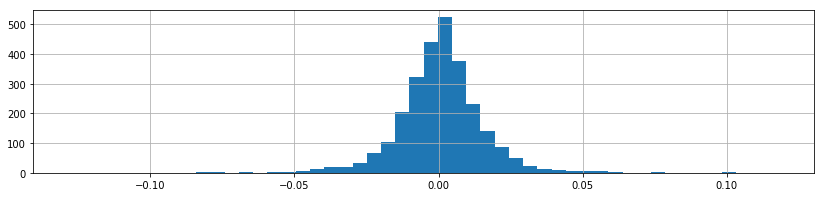

In [9]:
returns.hist(bins=50, figsize=(14,3));

simulated distribution

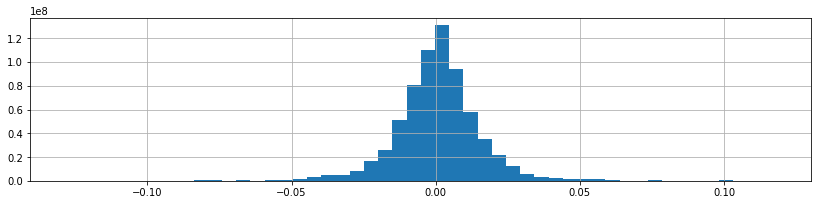

In [19]:
pd.Series(simulated_returns.values.flatten()).hist(bins=50, figsize=(14,3));

# Stats for actual returns

In [20]:
a=perf_stats(returns)
a

Annual return          0.186506
Cumulative returns     5.372309
Annual volatility      0.249071
Sharpe ratio           0.811335
Calmar ratio           0.464817
Stability              0.859923
Max drawdown          -0.401247
Omega ratio            1.162186
Sortino ratio          1.192251
Skew                   0.044925
Kurtosis               8.306355
Tail ratio             1.046774
Daily value at risk   -0.030578
dtype: float64

# Stats for simulated returns (median, max, min)

In [21]:
ratios_for_paths = pd.DataFrame([perf_stats(x[1]) for x in simulated_returns.T.iterrows()])

median

In [22]:
ratios_for_paths.median().T

Annual return          0.186516
Cumulative returns     5.372884
Annual volatility      0.248745
Sharpe ratio           0.812387
Calmar ratio           0.469454
Stability              0.878631
Max drawdown          -0.396087
Omega ratio            1.162245
Sortino ratio          1.194399
Skew                   0.051489
Kurtosis               8.128662
Tail ratio             1.045732
Daily value at risk   -0.030537
dtype: float64

max

In [23]:
ratios_for_paths.max().T

Annual return            0.695029
Cumulative returns     302.279912
Annual volatility        0.284963
Sharpe ratio             2.246184
Calmar ratio             3.814264
Stability                0.994660
Max drawdown            -0.159260
Omega ratio              1.509266
Sortino ratio            3.710838
Skew                     1.473334
Kurtosis                16.199432
Tail ratio               1.342799
Daily value at risk     -0.026418
dtype: float64

min

In [24]:
ratios_for_paths.min().T

Annual return         -1.351623e-01
Cumulative returns    -7.924887e-01
Annual volatility      2.168542e-01
Sharpe ratio          -4.453680e-01
Calmar ratio          -1.644516e-01
Stability              6.414362e-09
Max drawdown          -8.949605e-01
Omega ratio            9.205690e-01
Sortino ratio         -5.786823e-01
Skew                  -1.493246e+00
Kurtosis               2.276295e+00
Tail ratio             7.966363e-01
Daily value at risk   -3.542608e-02
dtype: float64

# Probability that max drawdown less than x

In [25]:
x = -.4
len(ratios_for_paths[ratios_for_paths['Max drawdown'] < x]) / number_of_paths

0.484532

# Probability that Sharpe lower than y

In [26]:
y = .6
len(ratios_for_paths[ratios_for_paths['Sharpe ratio'] < .6]) / number_of_paths

0.242748

# Probability that annual return less than z

In [27]:
z = .05
len(ratios_for_paths[ratios_for_paths['Annual return'] < z]) / number_of_paths

0.053924

# Some distributions

Max drawdown

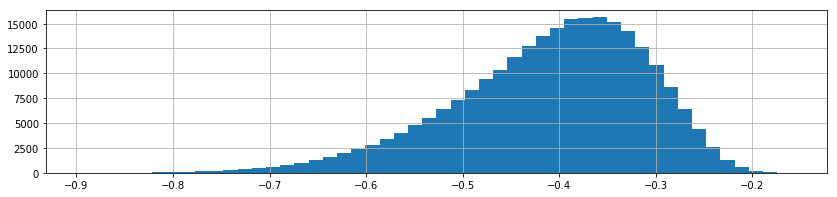

In [28]:
ratios_for_paths['Max drawdown'].hist(bins=50, figsize=(14,3));

Sharpe

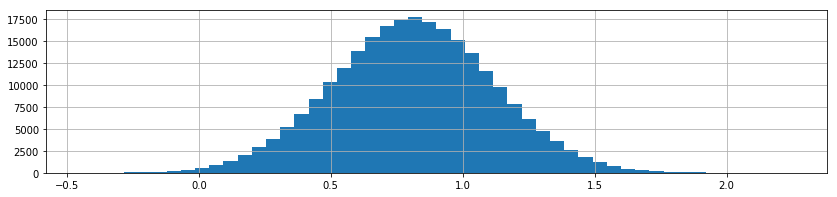

In [29]:
ratios_for_paths['Sharpe ratio'].hist(bins=50, figsize=(14,3));

Annual return

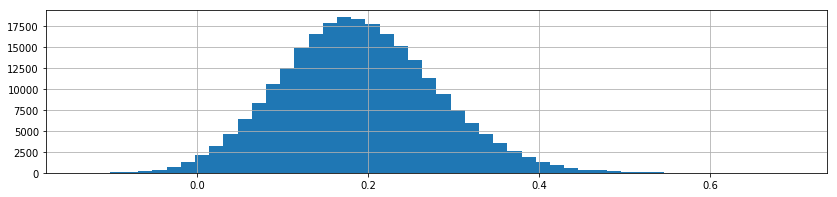

In [30]:
ratios_for_paths['Annual return'].hist(bins=50, figsize=(14,3));